In [1]:
from nlp_data_handle import *
from transformer_debugger import *

/anaconda/envs/py38_default/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
import argparse
import sys
sys.argv = ['']
parser=argparse.ArgumentParser()
parser.add_argument('-expt_num',dest="expt_name",type=str,default="9.0")
parser.add_argument('-num_samples',dest="num_samples",type=int,default=2000)
parser.add_argument('-num_topic_samples',dest="num_topic_samples",type=int,default=1200)
parser.add_argument('-num_topics',dest="num_topics",type=int,default=10)
parser.add_argument('-tfreq_ulim',dest="tfreq_ulim",type=float,default=1.0)
parser.add_argument('-transformer',dest="transformer",type=str,default="bert-base-uncased")
parser.add_argument('-num_epochs',dest="num_epochs",type=int,default=3)
parser.add_argument("-load_weight",dest="load_weight",type=str,default=None)

parser.add_argument('--train_bert',default=False,action="store_true")

args=parser.parse_args()
print(args)

#Defining the Data args
data_args={}
data_args["path"] = "dataset/amazon/"
data_args["transformer_name"]=args.transformer
data_args["num_class"]=2
data_args["max_len"]=200
data_args["num_sample"]=args.num_samples
data_args["num_topic_samples"]=args.num_topic_samples
data_args["batch_size"]=32
data_args["shuffle_size"]=data_args["batch_size"]*3
data_args["cat_list"]=["arts","books","phones","clothes","groceries","movies","pets","tools"]
data_args["num_topics"]=args.num_topics
data_args["topic_list"]=list(range(data_args["num_topics"]))
data_args["per_topic_class"]=2 #Each of the topic is binary (later could have more)
data_args["tfreq_ulim"]=args.tfreq_ulim
data_args["lda_epochs"]=25
data_args["min_df"]=0.0
data_args["max_df"]=1.0

#Defining the Model args
model_args={}
model_args["expt_name"]=args.expt_name
data_args["expt_name"]=model_args["expt_name"]
model_args["load_weight"]=args.load_weight
model_args["lr"]=0.001
model_args["epochs"]=args.num_epochs
model_args["valid_split"]=0.2
model_args["train_bert"]=args.train_bert
model_args["bemb_dim"] = 768        #The dimension of bert produced last layer
model_args["shuffle_topic_batch"]=False
model_args["load_epoch"] = 2

#Creating the metadata folder
meta_folder = "nlp_logs/{}".format(model_args["expt_name"])
os.makedirs(meta_folder,exist_ok=True)

# transformer_trainer(data_args,model_args)
load_and_analyze_transformer(data_args,model_args)

Namespace(expt_name='9.0', load_weight=None, num_epochs=3, num_samples=2000, num_topic_samples=1200, num_topics=10, tfreq_ulim=1.0, train_bert=False, transformer='bert-base-uncased')


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.73714286},
 {'tidx': 1, 'vacc': 0.9028571},
 {'tidx': 2, 'vacc': 0.81714284},
 {'tidx': 3, 'vacc': 0.9047619},
 {'tidx': 4, 'vacc': 0.97959185},
 {'tidx': 5, 'vacc': 0.8495238},
 {'tidx': 6, 'vacc': 0.96190476},
 {'tidx': 7, 'vacc': 0.92},
 {'tidx': 8, 'vacc': 0.94857144},
 {'tidx': 9, 'vacc': 0.94666666}]

correlation_policy:  weightedtau
[(0.16811703164061667, 6),
 (0.09192088089163528, 1),
 (0.0883103614291034, 9),
 (0.08342856973015192, 7),
 (0.05673139893399273, 3),
 (-0.010889808661146945, 2),
 (-0.02599276778892402, 5),
 (-0.12805410915403076, 8),
 (-0.1384743034180985, 0),
 (-0.1568397307355798, 4)]
Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.73714286},
 {'tidx': 1, 'vacc': 0.9028571},
 {'tidx': 2, 'vacc': 0.81714284},
 {'tidx': 3, 'vacc': 0.9047619},
 {'tidx': 4, 'vacc': 0.97959185},
 {'tidx': 5, 'vacc': 0.8495238},
 {'tidx': 6, 'vacc': 0.96190476},
 {'tidx': 7, 'vacc': 0.92},
 {'tidx': 8, 'vacc': 0.94857144},
 {'tidx': 9

In [5]:
classifier = TransformerClassifier(data_args,model_args)  
checkpoint_path = "nlp_logs/{}/cp_{}.ckpt".format(model_args["expt_name"],model_args["load_epoch"])
checkpoint_dir = os.path.dirname(checkpoint_path)
classifier.load_weights(checkpoint_path)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [6]:
sent_weights=[
        np.squeeze(tf.sigmoid(classifier.cat_importance_weight_list[cidx]).numpy())
                        for cidx in range(len(classifier.data_args["cat_list"]))
]
sent_weights = np.stack(sent_weights,axis=1)
dim_mean = np.mean(sent_weights,axis=1)
dim_std = np.std(sent_weights,axis=1)

(array([ 14.,  33.,  66., 109., 182., 166., 113.,  58.,  20.,   7.]),
 array([0.30043703, 0.34477076, 0.38910446, 0.43343818, 0.47777188,
        0.5221056 , 0.56643933, 0.610773  , 0.6551067 , 0.6994405 ,
        0.7437742 ], dtype=float32),
 <BarContainer object of 10 artists>)

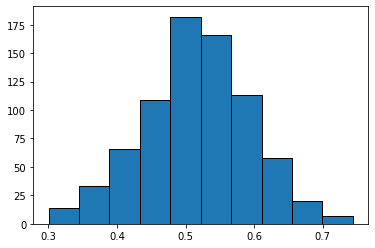

In [8]:
import matplotlib.pyplot as plt
plt.hist(dim_mean,edgecolor="k")

(array([  3.,  14.,  73., 101., 181., 180., 134.,  60.,  18.,   4.]),
 array([0.05282304, 0.08031961, 0.10781617, 0.13531275, 0.16280931,
        0.19030589, 0.21780246, 0.24529903, 0.2727956 , 0.30029216,
        0.32778874], dtype=float32),
 <BarContainer object of 10 artists>)

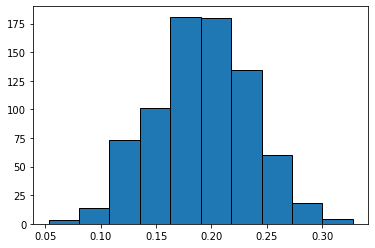

In [9]:
plt.hist(dim_std,edgecolor="k")

In [8]:
import argparse
import sys
import os
sys.argv = ['']#["-expt_num 8.1 -num_samples 1000 -num_topic_samples 600 -num_topics 10 -num_epochs 3 -transformer bert-base-uncased".split()]

parser=argparse.ArgumentParser()
parser.add_argument('-expt_num',dest="expt_name",type=str,default="9.2")
parser.add_argument('-num_samples',dest="num_samples",type=int,default=1000)
parser.add_argument('-num_topic_samples',dest="num_topic_samples",type=int,default=600)
parser.add_argument('-num_topics',dest="num_topics",type=int,default=10)
parser.add_argument('-tfreq_ulim',dest="tfreq_ulim",type=float,default=1.0)
parser.add_argument('-transformer',dest="transformer",type=str,default="bert-base-uncased")
parser.add_argument('-num_epochs',dest="num_epochs",type=int,default=3)
parser.add_argument("-load_weight",dest="load_weight",type=str,default=None)

parser.add_argument('--train_bert',default=False,action="store_true")

args=parser.parse_args()
print(args)

#Defining the Data args
data_args={}
data_args["path"] = "dataset/amazon/"
data_args["transformer_name"]=args.transformer
data_args["num_class"]=2
data_args["max_len"]=200
data_args["num_sample"]=args.num_samples
data_args["num_topic_samples"]=args.num_topic_samples
data_args["batch_size"]=32
data_args["shuffle_size"]=data_args["batch_size"]*3
data_args["cat_list"]=["arts","books","phones","clothes","groceries","movies","pets","tools"]
data_args["num_topics"]=args.num_topics
data_args["topic_list"]=list(range(data_args["num_topics"]))
data_args["per_topic_class"]=2 #Each of the topic is binary (later could have more)
data_args["tfreq_ulim"]=args.tfreq_ulim
data_args["lda_epochs"]=25
data_args["min_df"]=0.0
data_args["max_df"]=1.0

#Defining the Model args
model_args={}
model_args["expt_name"]=args.expt_name
data_args["expt_name"]=model_args["expt_name"]
model_args["load_weight"]=args.load_weight
model_args["lr"]=0.001
model_args["epochs"]=args.num_epochs
model_args["valid_split"]=0.2
model_args["train_bert"]=args.train_bert
model_args["bemb_dim"] = 768        #The dimension of bert produced last layer
model_args["shuffle_topic_batch"]=False
model_args["load_epoch"] = 2

#Creating the metadata folder
meta_folder = "nlp_logs/{}".format(model_args["expt_name"])
os.makedirs(meta_folder,exist_ok=True)

Namespace(expt_name='9.2', load_weight=None, num_epochs=3, num_samples=1000, num_topic_samples=600, num_topics=10, tfreq_ulim=1.0, train_bert=False, transformer='bert-base-uncased')


In [3]:
# transformer_trainer(data_args,model_args)
corr_dict_dot_0,corr_dict_cos_0 = load_and_analyze_transformer(data_args,model_args)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.7528958},
 {'tidx': 1, 'vacc': 0.85714287},
 {'tidx': 2, 'vacc': 0.77220076},
 {'tidx': 3, 'vacc': 0.88030887},
 {'tidx': 4, 'vacc': 0.9714286},
 {'tidx': 5, 'vacc': 0.76833975},
 {'tidx': 6, 'vacc': 0.96138996},
 {'tidx': 7, 'vacc': 0.8841699},
 {'tidx': 8, 'vacc': 0.9459459},
 {'tidx': 9, 'vacc': 0.96138996}]

correlation_policy:  dot
[(75.23517, 6),
 (74.031006, 8),
 (73.88884, 0),
 (73.39778, 5),
 (73.13145, 9),
 (72.54982, 2),
 (72.43613, 3),
 (72.15001, 1),
 (71.777, 4),
 (71.103485, 7)]
Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.7528958},
 {'tidx': 1, 'vacc': 0.85714287},
 {'tidx': 2, 'vacc': 0.77220076},
 {'tidx': 3, 'vacc': 0.88030887},
 {'tidx': 4, 'vacc': 0.9714286},
 {'tidx': 5, 'vacc': 0.76833975},
 {'tidx': 6, 'vacc': 0.96138996},
 {'tidx': 7, 'vacc': 0.8841699},
 {'tidx': 8, 'vacc': 0.9459459},
 {'tidx': 9, 'vacc': 0.96138996}]

correlation_policy:  weighted_dot
[(72.33034, 6),
 (70.30784, 9),
 (70.02933, 8),
 (69.

In [5]:
corr_dict_dot_1,corr_dict_cos_1 = load_and_analyze_transformer(data_args,model_args)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.73714286},
 {'tidx': 1, 'vacc': 0.9028571},
 {'tidx': 2, 'vacc': 0.81714284},
 {'tidx': 3, 'vacc': 0.9047619},
 {'tidx': 4, 'vacc': 0.97959185},
 {'tidx': 5, 'vacc': 0.8495238},
 {'tidx': 6, 'vacc': 0.96190476},
 {'tidx': 7, 'vacc': 0.92},
 {'tidx': 8, 'vacc': 0.94857144},
 {'tidx': 9, 'vacc': 0.94666666}]

correlation_policy:  dot
[(76.419586, 9),
 (75.050385, 1),
 (74.92236, 6),
 (74.83175, 7),
 (74.82127, 0),
 (74.696075, 5),
 (74.53465, 2),
 (74.43872, 8),
 (74.40418, 3),
 (72.47127, 4)]
Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.73714286},
 {'tidx': 1, 'vacc': 0.9028571},
 {'tidx': 2, 'vacc': 0.81714284},
 {'tidx': 3, 'vacc': 0.9047619},
 {'tidx': 4, 'vacc': 0.97959185},
 {'tidx': 5, 'vacc': 0.8495238},
 {'tidx': 6, 'vacc': 0.96190476},
 {'tidx': 7, 'vacc': 0.92},
 {'tidx': 8, 'vacc': 0.94857144},
 {'tidx': 9, 'vacc': 0.94666666}]

correlation_policy:  weighted_dot
[(72.34387, 9),
 (72.06818, 6),
 (70.99226, 4),
 (70.61044, 

In [7]:
corr_dict_dot_2,corr_dict_cos_2 = load_and_analyze_transformer(data_args,model_args)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.7676191},
 {'tidx': 1, 'vacc': 0.92},
 {'tidx': 2, 'vacc': 0.8485714},
 {'tidx': 3, 'vacc': 0.8933333},
 {'tidx': 4, 'vacc': 0.9809524},
 {'tidx': 5, 'vacc': 0.87333333},
 {'tidx': 6, 'vacc': 0.947619},
 {'tidx': 7, 'vacc': 0.92},
 {'tidx': 8, 'vacc': 0.95714283},
 {'tidx': 9, 'vacc': 0.9704762}]

correlation_policy:  dot
[(76.339615, 9),
 (74.89646, 8),
 (74.72342, 6),
 (74.27468, 1),
 (73.651215, 7),
 (72.97429, 3),
 (72.863495, 2),
 (72.61541, 5),
 (72.382706, 0),
 (71.97673, 4)]
Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.7676191},
 {'tidx': 1, 'vacc': 0.92},
 {'tidx': 2, 'vacc': 0.8485714},
 {'tidx': 3, 'vacc': 0.8933333},
 {'tidx': 4, 'vacc': 0.9809524},
 {'tidx': 5, 'vacc': 0.87333333},
 {'tidx': 6, 'vacc': 0.947619},
 {'tidx': 7, 'vacc': 0.92},
 {'tidx': 8, 'vacc': 0.95714283},
 {'tidx': 9, 'vacc': 0.9704762}]

correlation_policy:  weighted_dot
[(74.08578, 9),
 (71.68661, 8),
 (70.80933, 6),
 (70.60574, 4),
 (68.33271, 1),

In [9]:
corr_dict_dot_3,corr_dict_cos_3 = load_and_analyze_transformer(data_args,model_args)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.7990476},
 {'tidx': 1, 'vacc': 0.92285717},
 {'tidx': 2, 'vacc': 0.87},
 {'tidx': 3, 'vacc': 0.9009524},
 {'tidx': 4, 'vacc': 0.97376096},
 {'tidx': 5, 'vacc': 0.86714286},
 {'tidx': 6, 'vacc': 0.94714284},
 {'tidx': 7, 'vacc': 0.9342857},
 {'tidx': 8, 'vacc': 0.9576191},
 {'tidx': 9, 'vacc': 0.9742857}]

correlation_policy:  dot
[(76.87909, 9),
 (76.7301, 8),
 (75.73876, 0),
 (75.63417, 6),
 (75.286545, 2),
 (75.2589, 5),
 (75.23531, 1),
 (74.88873, 3),
 (74.39621, 7),
 (74.389694, 4)]
Topic_validation Accuracy:
[{'tidx': 0, 'vacc': 0.7990476},
 {'tidx': 1, 'vacc': 0.92285717},
 {'tidx': 2, 'vacc': 0.87},
 {'tidx': 3, 'vacc': 0.9009524},
 {'tidx': 4, 'vacc': 0.97376096},
 {'tidx': 5, 'vacc': 0.86714286},
 {'tidx': 6, 'vacc': 0.94714284},
 {'tidx': 7, 'vacc': 0.9342857},
 {'tidx': 8, 'vacc': 0.9576191},
 {'tidx': 9, 'vacc': 0.9742857}]

correlation_policy:  weighted_dot
[(74.9022, 9),
 (73.47821, 8),
 (72.43778, 4),
 (71.63636, 6),
 (69

In [32]:
from collections import defaultdict
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
def plot_timeline(corr_dict_list):
    topic_spuriousness = defaultdict(list)
    for corr_dict in corr_dict_list:
        for tname,tcorr in corr_dict.items():
            topic_spuriousness[tname].append(tcorr)
    
    #Now plotting the correlation timeline for each of the topic
    for tname,tcorr_list in topic_spuriousness.items():
        plt.plot(tcorr_list,"o-",alpha=0.99,label=tname)
    plt.legend()
    plt.grid()
    plt.show()

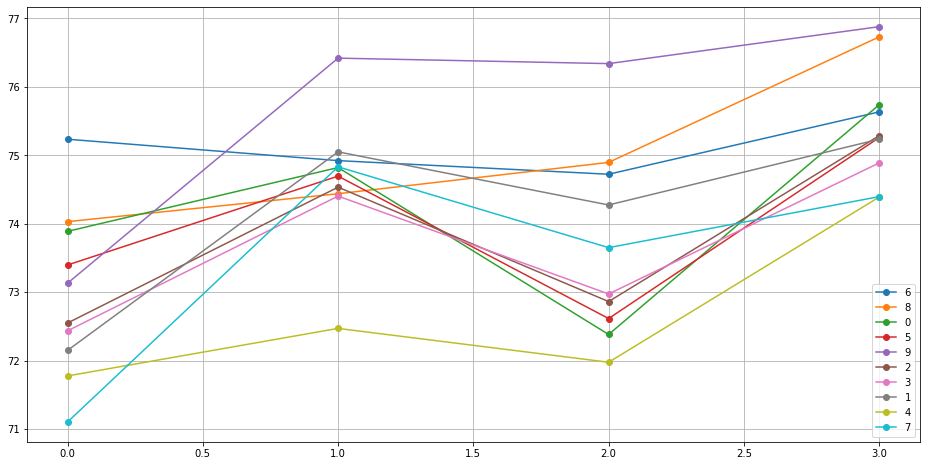

In [33]:
corr_dict_dot_list = [corr_dict_dot_0,corr_dict_dot_1,corr_dict_dot_2,corr_dict_dot_3,]
plot_timeline(corr_dict_dot_list)